# Advanced pandas Practice - Nashville City Cemetery

In this exercise, you'll get to explore some additional features of the pandas library for cleaning and summarizing data. This will be done using the Nashville City Cemetery data.

As a reminder, you can get more information about the data that you were working with here: [Nashville City Cemetery Metadata](https://data.nashville.gov/api/views/diwx-fgj7/files/963c111e-2e2a-4133-a807-2becd590feb2?download=true&filename=Historic-Nashville-City-Cemetery-Interments-1846-1979-Metadata-v2.pdf).

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [5]:
cem_df = pd.read_excel("C:/Users/caleb/Documents/NSS/projects/advanced-pandas-CalebLucas11/data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx")

In [13]:
cem_df.head()

Volume                           Name Burial Month  Month No.  Burial Day  \
0     6B                Bell, Nancy Ann          Aug        8.0         6.0   
1     6W  Drake, Mary Edith Smith, Mrs.          May        5.0        19.0   
2     6D                  Davis, Bessie          Sep        9.0        19.0   
3     6C            Creech, Emily Green          Aug        8.0         NaN   
4     6W            Creech, Emily Green          Aug        8.0         NaN   

   Burial Year Sex Race   Age             Residence Cause of Death/Burial  \
0       1979.0   F    W  10.0                   NaN                   NaN   
1       1979.0   F    W  67.0         Madison, Tenn                Cancer   
2       1979.0   F    W  90.0             Nashville               Old Age   
3       1978.0   F    W  91.0             Nashville                   NaN   
4       1978.0   F    W  91.0  Nashville, Tennessee                   NaN   

                Ave             Section/Lot  \
0               Oak      sec. 28 NW, lot 12   
1  Locust, Boyd Lot                  lot 10   
2            Poplar  McAllister, E25, lot 8   
3        sect.ion 9                      15   
4               NaN                     NaN   

                                             Remarks  
0                                   J. L. Hughes lot  
1  wife of Alex M. Drake, Madison Funeral Home Of...  
2                            daughter of Helen Davis  
3                                           Magnolia  
4                                          Malgnolia

2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings. 

A. 

In [7]:
top_10_deaths = cem_df['Cause of Death/Burial'].value_counts().head(10)
top_10_deaths

Cause of Death/Burial
Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: count, dtype: int64

B.

In [8]:
cem_df['Cause of Death/Burial'].replace({'Cholrea':'Cholera','Still Born':'Stillborn','Not Known':"Unknown"}, inplace=True)

C.

In [9]:
top_10_deaths = cem_df['Cause of Death/Burial'].value_counts().head(10)
top_10_deaths

Cause of Death/Burial
Unknown         1899
Consumption     1767
Cholera         1242
Stillborn        926
Old Age          604
Pneumonia        516
Flux             469
Complication     446
Cold             421
Teething         411
Name: count, dtype: int64

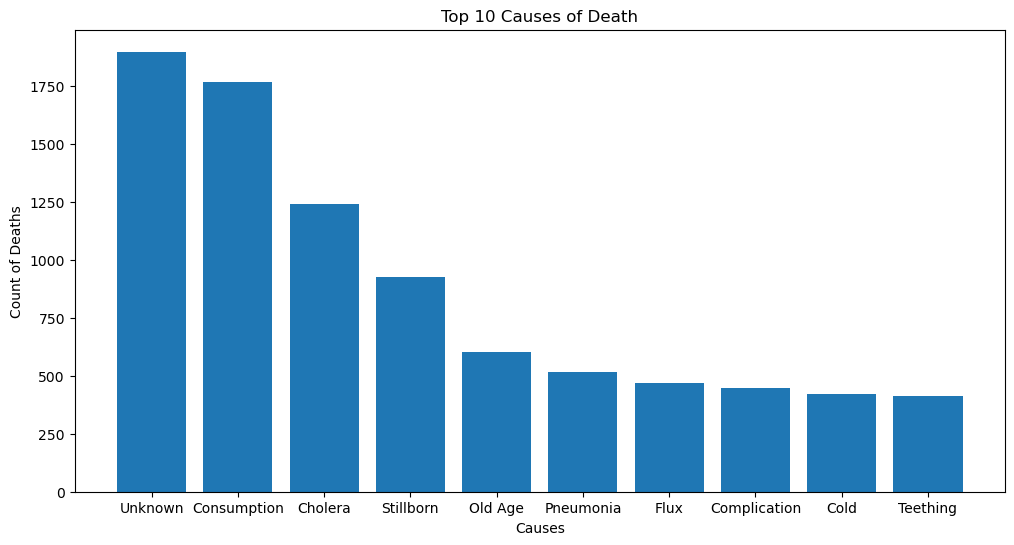

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_deaths.index, top_10_deaths.values)
plt.title('Top 10 Causes of Death')
plt.xlabel('Causes')
plt.ylabel("Count of Deaths");

3. Create a line chart showing the number of burials per year.

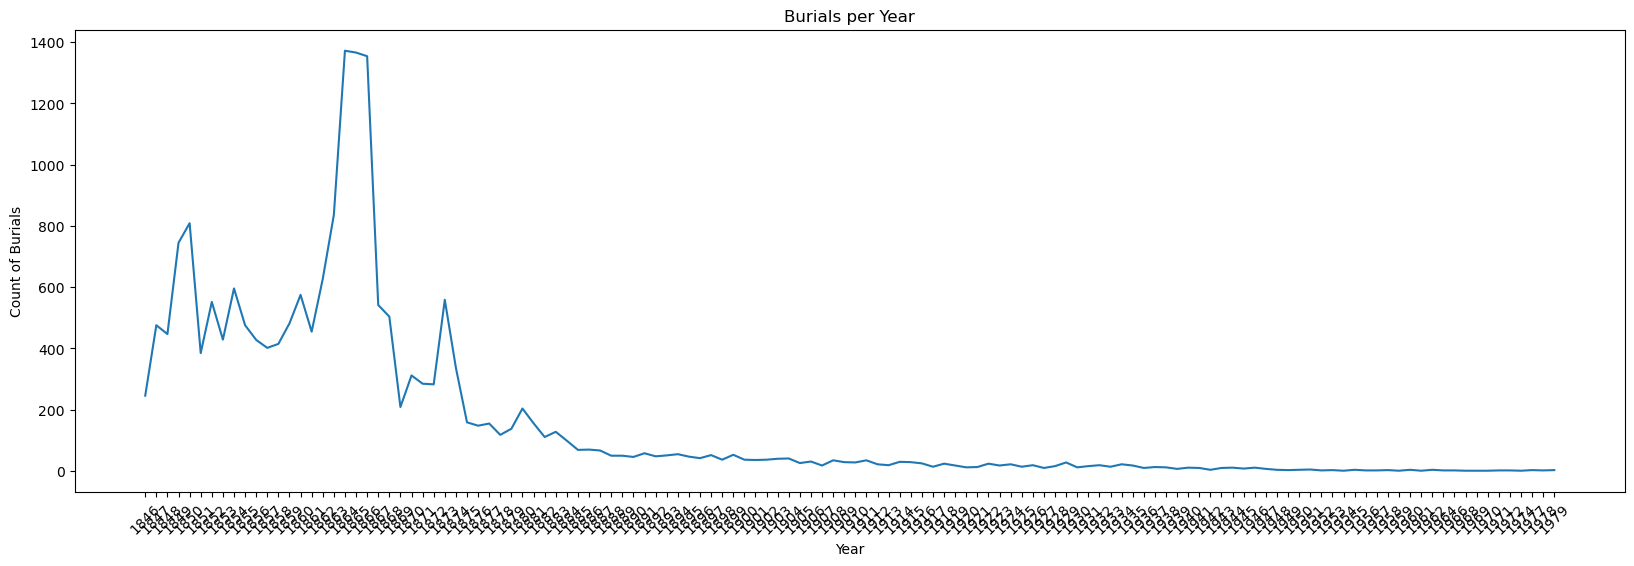

In [47]:
cem_df = cem_df.dropna(subset=['Burial Year'])
cem_df['Burial Year'] = cem_df['Burial Year'].astype(int)
plt.figure(figsize=(20,6)) #this is trash
plt.plot(cem_df['Burial Year'].astype(str).value_counts().sort_index())
plt.title("Burials per Year")
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylabel("Count of Burials")
plt.show()

In [ ]:
cem_df['Decade'] = (cem_df['Burial Year'] // 10 * 10).astype(int)

4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  
    **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

A.

In [53]:
pd.crosstab(cem_df['Burial Year'], cem_df['Month No.'])

Month No.    1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  \
Burial Year                                                                     
1846           20    26    25    22    26     0     0     0    35    39    23   
1847           43    34    38    35    26    47    40    61    35    47    36   
1848           36    36    49    37    41    47    65    39    23    26    21   
1849           46    64    64    43    62   231    96    36    28    18    24   
1850           24    26    43    29    37   120   370    52    22    27    28   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1972            0     0     0     1     0     0     0     0     0     0     0   
1974            0     0     0     0     0     0     0     0     0     0     1   
1977            0     0     1     0     1     0     0     0     0     0     1   
1978            0     0     0     0     0     0     0     2     0     0     0   
1979            0     0     0     0     1     0     0     1     1     0     0   

Month No.    12.0  
Burial Year        
1846           30  
1847           34  
1848           27  
1849           33  
1850           31  
...           ...  
1972            0  
1974            0  
1977            0  
1978            0  
1979            0  

[128 rows x 12 columns]

B.

In [68]:
cem_df = cem_df.dropna(subset=['Burial Year'])  
pd.crosstab(cem_df['Burial Year'].astype(int), cem_df['Month No.'])

Month No.    1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  \
Burial Year                                                                     
1846           20    26    25    22    26     0     0     0    35    39    23   
1847           43    34    38    35    26    47    40    61    35    47    36   
1848           36    36    49    37    41    47    65    39    23    26    21   
1849           46    64    64    43    62   231    96    36    28    18    24   
1850           24    26    43    29    37   120   370    52    22    27    28   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1972            0     0     0     1     0     0     0     0     0     0     0   
1974            0     0     0     0     0     0     0     0     0     0     1   
1977            0     0     1     0     1     0     0     0     0     0     1   
1978            0     0     0     0     0     0     0     2     0     0     0   
1979            0     0     0     0     1     0     0     1     1     0     0   

Month No.    12.0  
Burial Year        
1846           30  
1847           34  
1848           27  
1849           33  
1850           31  
...           ...  
1972            0  
1974            0  
1977            0  
1978            0  
1979            0  

[128 rows x 12 columns]

C.

In [66]:
cem_df = cem_df.dropna(subset=['Burial Year'])
df_1846_1860 = cem_df[(cem_df['Burial Year'] >= 1846) & (cem_df['Burial Year'] <= 1860)] 
pd.crosstab(df_1846_1860['Burial Year'].astype(int), df_1846_1860['Month No.'])

Month No.    1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  \
Burial Year                                                                     
1846           20    26    25    22    26     0     0     0    35    39    23   
1847           43    34    38    35    26    47    40    61    35    47    36   
1848           36    36    49    37    41    47    65    39    23    26    21   
1849           46    64    64    43    62   231    96    36    28    18    24   
1850           24    26    43    29    37   120   370    52    22    27    28   
1851           26    31    27    29    26    37    49    35    32    42    14   
1852           37    32    39    37    58    84    76    54    31    32    36   
1853           35    39    35    31    36    54    47    32    34    27    28   
1854           35    33    34    43    61   137    95    44    34    25    25   
1855           30    22    20    34    38    58    75    42    54    33    32   
1856           29    34    30    33    35    42    51    37    38    43    28   
1857           31    34    34    34    34    37    36    35    38    32    23   
1858           38    28    34    37    34    28    43    47    21    34    29   
1859           41    61    36    35    42    53    42    35    35    34    35   
1860           41    35    35    38    53    64    64    49    62    51    39   

Month No.    12.0  
Burial Year        
1846           30  
1847           34  
1848           27  
1849           33  
1850           31  
1851           37  
1852           36  
1853           31  
1854           30  
1855           38  
1856           28  
1857           34  
1858           42  
1859           33  
1860           44

D.

In [81]:
highest_month_year = cem_df.groupby(['Month No.', 'Burial Year']).size().idxmax()
max_month, max_year = highest_month_year
highest = cem_df[(cem_df['Month No.'] == max_month) & (cem_df['Burial Year'] == max_year)]
highest

Volume              Name Burial Month  Month No.  Burial Day  \
7029  5-1866    Esters, Newnan          Sep        9.0        16.0   
7185  5-1866   White, Thornton          Sep        9.0         1.0   
7186  5-1866  Philipps, Samuel          Sep        9.0         1.0   
7187  5-1866     Enbonn, Henry          Sep        9.0         1.0   
7188  5-1866    Mitchel, Henry          Sep        9.0         1.0   
...      ...               ...          ...        ...         ...   
7620  5-1866        Tate, Zack          Sep        9.0        30.0   
7621  5-1866    Reece, Charles          Sep        9.0        30.0   
7622  5-1866            Infant          Sep        9.0        30.0   
7623  5-1866    Swanson, Cenia          Sep        9.0        30.0   
7624  5-1866    Lagan, Charles          Sep        9.0        30.0   

      Burial Year Sex Race   Age Residence Cause of Death/Burial        Ave  \
7029         1866   M    W  10.0      City               Cholera     Cherry   
7185         1866   M    B  21.0      City               Cholera  Negro lot   
7186         1866   M    B   6.0      City        Whooping Cough  Negro lot   
7187         1866   M    W   NaN      City              Drownded   Southern   
7188         1866   M    B   7.0      City               Cholera  Negro lot   
...           ...  ..  ...   ...       ...                   ...        ...   
7620         1866   M    W  25.0      City               Cholera    Central   
7621         1866   M    W  25.0      City               Unknown     Cherry   
7622         1866   F    W   NaN      City               Cholera   Magnolia   
7623         1866   F    B  50.0      City               Cholera  Negro lot   
7624         1866   M    B   NaN      City               Cholera  Negro lot   

     Section/Lot                            Remarks  
7029      pauper                                NaN  
7185        200p                           f. m. c.  
7186        100p                      free of color  
7187      pauper  buried in Southers Soldiers Grave  
7188      pauper                      free of color  
...          ...                                ...  
7620        200p                                NaN  
7621      pauper                   from County Jale  
7622         lot             child of William White  
7623      pauper                           f. w. c.  
7624      pauper                           f. m. c.  

[441 rows x 14 columns]

5. **Burials per Decade**  
    a. Create a "Decade" column to show the decade in which a burial occurred.    
    b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.  
    c. Create a clustered bar chart to show how male and female burials have changed over time.

A. 

In [102]:
cem_df['Decade'] = (cem_df['Burial Year'] // 10 * 10).astype(int) 
cem_df

Volume                           Name Burial Month  Month No.  \
0          6B                Bell, Nancy Ann          Aug        8.0   
1          6W  Drake, Mary Edith Smith, Mrs.          May        5.0   
2          6D                  Davis, Bessie          Sep        9.0   
3          6C            Creech, Emily Green          Aug        8.0   
4          6W            Creech, Emily Green          Aug        8.0   
...       ...                            ...          ...        ...   
19738  4-1846                         Emmily          Sep        9.0   
19739  4-1846                         infant          Sep        9.0   
19740  4-1846            Kingsley, A., Capt.          Sep        9.0   
19741  4-1846                         infant          Sep        9.0   
19742  4-1846                 White, Lucinda          Sep        9.0   

       Burial Day  Burial Year Sex Race   Age             Residence  \
0             6.0         1979   F    W  10.0                   NaN   
1            19.0         1979   F    W  67.0         Madison, Tenn   
2            19.0         1979   F    W  90.0             Nashville   
3             NaN         1978   F    W  91.0             Nashville   
4             NaN         1978   F    W  91.0  Nashville, Tennessee   
...           ...          ...  ..  ...   ...                   ...   
19738        25.0         1846   F    B  16.0                  City   
19739        26.0         1846   M    W   NaN                  City   
19740        28.0         1846   M    W  67.0                  City   
19741        28.0         1846   M    W   NaN                  City   
19742        29.0         1846   F    W  25.0                  City   

      Cause of Death/Burial               Ave             Section/Lot  \
0                       NaN               Oak      sec. 28 NW, lot 12   
1                    Cancer  Locust, Boyd Lot                  lot 10   
2                   Old Age            Poplar  McAllister, E25, lot 8   
3                       NaN        sect.ion 9                      15   
4                       NaN               NaN                     NaN   
...                     ...               ...                     ...   
19738                Feever            Poplar                     200   
19739             Diarherea           Central                     lot   
19740                Feever             Cedar                     lot   
19741             Diarherea           Central                     lot   
19742           Consumption           Central                     200   

                                                 Remarks  Decade  
0                                       J. L. Hughes lot    1970  
1      wife of Alex M. Drake, Madison Funeral Home Of...    1970  
2                                daughter of Helen Davis    1970  
3                                               Magnolia    1970  
4                                              Malgnolia    1970  
...                                                  ...     ...  
19738                               slave to J. Chappell    1840  
19739                    son of Mr. E. Maguire Box grave    1840  
19740               superintendent of Nashville Cemetery    1840  
19741                                son of John Bateman    1840  
19742                     Fees to be paid by M. Jennings    1840  

[19743 rows x 15 columns]

B.

C.


### Bonus Questions

6. **Burials per Age Group**  
    a. Add a column to the original dataset to classify each row to one of the following categories (0-18, 19-25, 26-40, 41-64, and 65+). (Hint: One way to do this is using the [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)).  
    b. Create a "Year Group" dividing the records up based on burial year. Use the following groups: Before 1880, 1880-1900, 1901-1920, After 1920.  
    c. Use a grouped bar chart to show how the proportion of burials per age group has changed over time. How would you describe the trends in terms of proportion of burials per age group over time?


7. **Last Names**  
    a. Create a new column titled Last Name. Extract the last name from the Name column by subsetting to all characters to the left of the comma. (Hint: See the pandas [string split function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html). When you do this, make sure to consider cases where the name does not contain a comma.  
    b. What are the most common last names that appear?


8. The Civil War ended in April, 1865, with the last full year of fighting occurring in 1864.    
   a. Create a new DataFrame, burials_1864 by subsetting the full data to the rows for 1864 burials.  
   b. For any rows whose name contains the word "infant" (capitalized or lowercase), replace the "Age" value with 0.   
   c. Create a new column called age_category. If the individual was age 0 put "Infant". If the individual was not an infant but under age 18, put "Child". Everyone aged 18 and above should be listed as "Adult".  
   d.  Find the mean age for each age group.    
   e.  Find the last infant to be buried in 1864. Two ways this could be accomplished are sorting by both the month number and burial day or by creating a date column (for example, by using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and then sorting by this date column.